In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/transcriptomics-data/detectable_genes.csv')

data.head()

,Gene_symbol,NAME,Foldchange,PValue,FDR,1posH,2posH,3posH,4posH,5posH,6posH,1negH,2negH,3negH,4negH,5negH,6negH
0,0610007P14Rik,RIKEN cDNA 0610007P14 gene,1.096333,0.237007,0.999902,24.061225,22.944972,21.897173,19.840338,27.577471,21.312612,21.029999,24.146191,19.102242,20.951491,20.477456,19.736071
1,0610009B22Rik,RIKEN cDNA 0610009B22 gene,-1.025547,0.740390,0.999902,12.942468,10.845574,11.913660,10.309783,12.922427,11.597676,12.474068,12.291472,12.133346,11.639717,11.900859,11.783808
2,0610009L18Rik,RIKEN cDNA 0610009L18 gene,-1.021398,0.916932,0.999902,0.823612,0.564221,0.998351,1.258753,1.949193,0.979025,1.199430,1.310258,0.746667,0.440422,1.329705,1.662746
3,0610009O20Rik,RIKEN cDNA 0610009O20 gene,-1.050696,0.427450,0.999902,40.533458,38.993914,36.273433,38.062279,34.941088,35.621433,39.461234,40.368439,39.946707,39.889625,39.292780,36.941877
4,0610010B08Rik,RIKEN cDNA 0610010B08 gene,-1.221902,0.116814,0.999902,12.530663,28.211031,19.301460,31.229051,29.021317,24.475614,32.744429,43.612888,31.111143,22.398591,22.073102,24.796602


<ipython-input-7-b83de77c58d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['1posH'], shade=True)


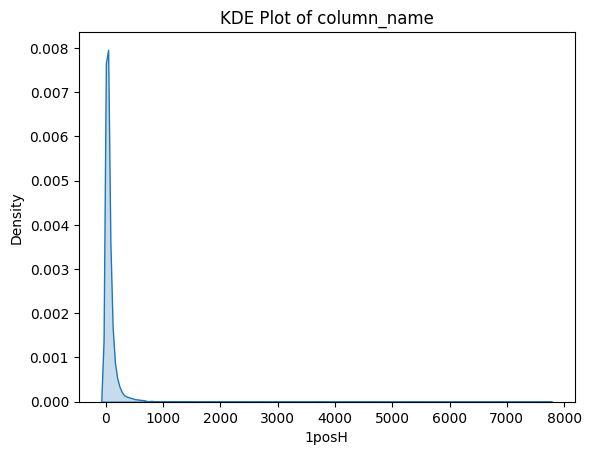

In [ ]:
numeric_columns = data.drop(columns=['Gene_symbol', 'NAME'])

sns.kdeplot(data['1posH'], shade=True)
plt.title('KDE Plot of column_name')
plt.show()

In [2]:
from sklearn.preprocessing import LabelEncoder
label_e=LabelEncoder()
data['Gene_symbol']=label_e.fit_transform(data['Gene_symbol'])
data['NAME']=label_e.fit_transform(data['NAME'])

In [3]:
df_numerical_features = data.select_dtypes(exclude='object')
df_categorical_features = data.select_dtypes(include='object')

num_cols = list(df_numerical_features)
cat_cols = list(df_categorical_features)

In [4]:
!pip install ydata-synthetic==1.1.0

In [5]:
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
#Defining the training parameters
noise_dim = 128
dim = 128
batch_size = 500

log_step = 100
epochs = 100
learning_rate = [5e-4, 3e-3]
beta_1 = 0.5
beta_2 = 0.9
models_dir = '../cache'

gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             sample_interval=log_step)

synth = RegularSynthesizer(modelname='wgangp', model_parameters=gan_args, n_critic=2)
synth.fit(data, train_args, num_cols, cat_cols)

synth.save('wgangp-trans.pkl')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | disc_loss: 0.06373768299818039 | gen_loss: -0.10273293405771255


  2%|▏         | 2/100 [00:29<23:32, 14.41s/it]

Epoch: 1 | disc_loss: 0.2265600711107254 | gen_loss: -0.04604950547218323


  3%|▎         | 3/100 [00:44<23:08, 14.31s/it]

Epoch: 2 | disc_loss: 0.01568644493818283 | gen_loss: -0.040172725915908813


  4%|▍         | 4/100 [00:51<18:13, 11.39s/it]

Epoch: 3 | disc_loss: -0.020454425364732742 | gen_loss: 0.03237226605415344


  5%|▌         | 5/100 [01:00<16:39, 10.52s/it]

Epoch: 4 | disc_loss: 0.2892095446586609 | gen_loss: 0.030121704563498497


  6%|▌         | 6/100 [01:05<13:38,  8.71s/it]

Epoch: 5 | disc_loss: 6.0446696281433105 | gen_loss: 0.02937471494078636


  7%|▋         | 7/100 [01:08<10:55,  7.04s/it]

Epoch: 6 | disc_loss: 0.22703944146633148 | gen_loss: -0.0016942062648013234


  8%|▊         | 8/100 [01:15<10:28,  6.84s/it]

Epoch: 7 | disc_loss: 8.319663047790527 | gen_loss: 0.029458168894052505


  9%|▉         | 9/100 [01:18<08:50,  5.83s/it]

Epoch: 8 | disc_loss: 0.06551980972290039 | gen_loss: 0.026338990777730942


 10%|█         | 10/100 [01:22<07:42,  5.14s/it]

Epoch: 9 | disc_loss: 0.06679731607437134 | gen_loss: -0.005196799524128437


 11%|█         | 11/100 [01:26<07:14,  4.88s/it]

Epoch: 10 | disc_loss: 0.6119617223739624 | gen_loss: -0.017294714227318764


 12%|█▏        | 12/100 [01:32<07:29,  5.11s/it]

Epoch: 11 | disc_loss: 1.7848573923110962 | gen_loss: 0.019442688673734665


 13%|█▎        | 13/100 [01:35<06:45,  4.66s/it]

Epoch: 12 | disc_loss: 1.3348199129104614 | gen_loss: 0.02161920815706253


 14%|█▍        | 14/100 [01:39<06:13,  4.35s/it]

Epoch: 13 | disc_loss: 0.5744207501411438 | gen_loss: 0.03783629089593887


 15%|█▌        | 15/100 [01:44<06:30,  4.59s/it]

Epoch: 14 | disc_loss: 3.724179744720459 | gen_loss: 0.01651935651898384


 16%|█▌        | 16/100 [01:49<06:28,  4.62s/it]

Epoch: 15 | disc_loss: 0.1158643513917923 | gen_loss: 0.03121090494096279


 17%|█▋        | 17/100 [01:53<05:58,  4.32s/it]

Epoch: 16 | disc_loss: 0.16477657854557037 | gen_loss: 0.07221630960702896


 18%|█▊        | 18/100 [01:56<05:36,  4.10s/it]

Epoch: 17 | disc_loss: 0.8162077069282532 | gen_loss: 0.05554719641804695


 19%|█▉        | 19/100 [02:02<06:24,  4.74s/it]

Epoch: 18 | disc_loss: 0.4587143063545227 | gen_loss: 0.03815405070781708


 20%|██        | 20/100 [02:06<05:56,  4.45s/it]

Epoch: 19 | disc_loss: 0.03260238096117973 | gen_loss: 0.027822725474834442


 21%|██        | 21/100 [02:10<05:31,  4.20s/it]

Epoch: 20 | disc_loss: -0.00411374494433403 | gen_loss: 0.06064264476299286


 22%|██▏       | 22/100 [02:15<05:41,  4.38s/it]

Epoch: 21 | disc_loss: 10.080810546875 | gen_loss: 0.05076519772410393


 23%|██▎       | 23/100 [02:20<06:03,  4.72s/it]

Epoch: 22 | disc_loss: 0.17525489628314972 | gen_loss: 0.02160552330315113


 24%|██▍       | 24/100 [02:24<05:33,  4.38s/it]

Epoch: 23 | disc_loss: 0.047134630382061005 | gen_loss: 0.04750150442123413


 25%|██▌       | 25/100 [02:27<05:13,  4.17s/it]

Epoch: 24 | disc_loss: 0.03775627911090851 | gen_loss: 0.0405697263777256


 26%|██▌       | 26/100 [02:34<06:01,  4.89s/it]

Epoch: 25 | disc_loss: 0.2001214176416397 | gen_loss: 0.048382095992565155


 27%|██▋       | 27/100 [02:41<06:36,  5.43s/it]

Epoch: 26 | disc_loss: 0.007034278474748135 | gen_loss: 0.02775799110531807


 28%|██▊       | 28/100 [02:44<05:52,  4.89s/it]

Epoch: 27 | disc_loss: 0.6340293884277344 | gen_loss: -0.31230875849723816


 29%|██▉       | 29/100 [02:49<05:37,  4.75s/it]

Epoch: 28 | disc_loss: -0.06927981227636337 | gen_loss: 0.06027333438396454


 30%|███       | 30/100 [02:55<06:04,  5.21s/it]

Epoch: 29 | disc_loss: 0.07367810606956482 | gen_loss: -0.1473616659641266


 31%|███       | 31/100 [02:59<05:26,  4.73s/it]

Epoch: 30 | disc_loss: -0.0652400553226471 | gen_loss: 0.10454777628183365


 32%|███▏      | 32/100 [03:02<04:59,  4.40s/it]

Epoch: 31 | disc_loss: 0.15770718455314636 | gen_loss: 0.060290273278951645


 33%|███▎      | 33/100 [03:07<04:55,  4.42s/it]

Epoch: 32 | disc_loss: 0.6729211807250977 | gen_loss: 0.024080462753772736


 34%|███▍      | 34/100 [03:12<05:13,  4.75s/it]

Epoch: 33 | disc_loss: 0.33630701899528503 | gen_loss: 0.023449743166565895


 35%|███▌      | 35/100 [03:16<04:46,  4.41s/it]

Epoch: 34 | disc_loss: 0.047021713107824326 | gen_loss: 0.10635019093751907


 36%|███▌      | 36/100 [03:19<04:26,  4.16s/it]

Epoch: 35 | disc_loss: 0.047446489334106445 | gen_loss: 0.06270784139633179


 37%|███▋      | 37/100 [03:25<04:43,  4.50s/it]

Epoch: 36 | disc_loss: 0.010581599548459053 | gen_loss: 0.06847069412469864


 38%|███▊      | 38/100 [03:29<04:42,  4.56s/it]

Epoch: 37 | disc_loss: 0.054253265261650085 | gen_loss: 0.0482761412858963


 39%|███▉      | 39/100 [03:33<04:20,  4.28s/it]

Epoch: 38 | disc_loss: 0.05641624331474304 | gen_loss: 0.04246088117361069


 40%|████      | 40/100 [03:37<04:04,  4.08s/it]

Epoch: 39 | disc_loss: 0.2795001268386841 | gen_loss: 0.03174140676856041


 41%|████      | 41/100 [03:43<04:40,  4.75s/it]

Epoch: 40 | disc_loss: 0.028540946543216705 | gen_loss: 0.018252255395054817


 42%|████▏     | 42/100 [03:47<04:18,  4.45s/it]

Epoch: 41 | disc_loss: 0.028177954256534576 | gen_loss: 0.02724328637123108


 43%|████▎     | 43/100 [03:50<03:58,  4.19s/it]

Epoch: 42 | disc_loss: 0.00027831734041683376 | gen_loss: 0.03018188662827015


 44%|████▍     | 44/100 [03:54<03:53,  4.18s/it]

Epoch: 43 | disc_loss: 0.0889604240655899 | gen_loss: 0.016530396416783333


 45%|████▌     | 45/100 [04:00<04:16,  4.66s/it]

Epoch: 44 | disc_loss: -0.0013849842362105846 | gen_loss: 0.029620401561260223


 46%|████▌     | 46/100 [04:04<03:54,  4.34s/it]

Epoch: 45 | disc_loss: -0.003111819736659527 | gen_loss: 0.041307587176561356


 47%|████▋     | 47/100 [04:07<03:38,  4.12s/it]

Epoch: 46 | disc_loss: 0.006226132623851299 | gen_loss: 0.016678744927048683


 48%|████▊     | 48/100 [04:12<03:47,  4.37s/it]

Epoch: 47 | disc_loss: 0.20666003227233887 | gen_loss: 0.031151466071605682


 49%|████▉     | 49/100 [04:17<03:53,  4.58s/it]

Epoch: 48 | disc_loss: 2.2562685012817383 | gen_loss: 0.02986699901521206


 50%|█████     | 50/100 [04:21<03:34,  4.28s/it]

Epoch: 49 | disc_loss: 0.016028542071580887 | gen_loss: 0.030084870755672455


 51%|█████     | 51/100 [04:25<03:19,  4.07s/it]

Epoch: 50 | disc_loss: 0.17203092575073242 | gen_loss: 0.036683280020952225


 52%|█████▏    | 52/100 [04:31<03:41,  4.62s/it]

Epoch: 51 | disc_loss: -0.0010365654015913606 | gen_loss: 0.030699536204338074


 53%|█████▎    | 53/100 [04:35<03:36,  4.62s/it]

Epoch: 52 | disc_loss: 0.05372266843914986 | gen_loss: 0.03278026729822159


 54%|█████▍    | 54/100 [04:39<03:22,  4.41s/it]

Epoch: 53 | disc_loss: 0.5764449834823608 | gen_loss: 0.034003935754299164


 55%|█████▌    | 55/100 [04:43<03:17,  4.38s/it]

Epoch: 54 | disc_loss: 0.0034011658281087875 | gen_loss: 0.011669563129544258


 56%|█████▌    | 56/100 [04:49<03:25,  4.67s/it]

Epoch: 55 | disc_loss: 0.1082414835691452 | gen_loss: 0.04735199362039566


 57%|█████▋    | 57/100 [04:52<03:06,  4.34s/it]

Epoch: 56 | disc_loss: 0.020260972902178764 | gen_loss: 0.018655965104699135


 58%|█████▊    | 58/100 [04:56<02:53,  4.14s/it]

Epoch: 57 | disc_loss: 0.011339670047163963 | gen_loss: 0.026913484558463097


 59%|█████▉    | 59/100 [05:01<03:05,  4.52s/it]

Epoch: 58 | disc_loss: -0.00658697634935379 | gen_loss: 0.03099789284169674


 60%|██████    | 60/100 [05:06<03:00,  4.50s/it]

Epoch: 59 | disc_loss: 0.5335276126861572 | gen_loss: 0.028957964852452278


 61%|██████    | 61/100 [05:09<02:45,  4.24s/it]

Epoch: 60 | disc_loss: 0.01706731878221035 | gen_loss: 0.012530558742582798


 62%|██████▏   | 62/100 [05:13<02:33,  4.05s/it]

Epoch: 61 | disc_loss: 0.00878481287509203 | gen_loss: 0.039200492203235626


 63%|██████▎   | 63/100 [05:19<02:55,  4.75s/it]

Epoch: 62 | disc_loss: 0.010159374214708805 | gen_loss: 0.026916326954960823


 64%|██████▍   | 64/100 [05:23<02:38,  4.40s/it]

Epoch: 63 | disc_loss: 0.05881565436720848 | gen_loss: 0.01812262088060379


 65%|██████▌   | 65/100 [05:27<02:25,  4.16s/it]

Epoch: 64 | disc_loss: -0.000861836364492774 | gen_loss: 0.03513830900192261


 66%|██████▌   | 66/100 [05:31<02:22,  4.19s/it]

Epoch: 65 | disc_loss: 0.008575739338994026 | gen_loss: 0.028889073058962822


 67%|██████▋   | 67/100 [05:37<02:32,  4.62s/it]

Epoch: 66 | disc_loss: 0.007709577679634094 | gen_loss: 0.022428035736083984


 68%|██████▊   | 68/100 [05:40<02:18,  4.32s/it]

Epoch: 67 | disc_loss: 0.004090834408998489 | gen_loss: 0.03621741384267807


 69%|██████▉   | 69/100 [05:44<02:06,  4.09s/it]

Epoch: 68 | disc_loss: -0.0015661930665373802 | gen_loss: 0.036463212221860886


 70%|███████   | 70/100 [05:49<02:13,  4.43s/it]

Epoch: 69 | disc_loss: 0.060744866728782654 | gen_loss: -0.010322467423975468


 71%|███████   | 71/100 [05:54<02:11,  4.52s/it]

Epoch: 70 | disc_loss: 0.34587469696998596 | gen_loss: 0.04499334469437599


 72%|███████▏  | 72/100 [05:57<01:58,  4.24s/it]

Epoch: 71 | disc_loss: 0.01887168549001217 | gen_loss: 0.026828216388821602


 73%|███████▎  | 73/100 [06:01<01:49,  4.06s/it]

Epoch: 72 | disc_loss: 0.6546710729598999 | gen_loss: 0.03500865399837494


 74%|███████▍  | 74/100 [06:07<02:01,  4.69s/it]

Epoch: 73 | disc_loss: 0.023444276303052902 | gen_loss: 0.04535621032118797


 75%|███████▌  | 75/100 [06:11<01:50,  4.41s/it]

Epoch: 74 | disc_loss: 0.024325214326381683 | gen_loss: 0.007129549980163574


 76%|███████▌  | 76/100 [06:14<01:39,  4.16s/it]

Epoch: 75 | disc_loss: 0.012680585496127605 | gen_loss: 0.04749022051692009


 77%|███████▋  | 77/100 [06:18<01:35,  4.16s/it]

Epoch: 76 | disc_loss: 0.35448572039604187 | gen_loss: 0.0400489941239357


 78%|███████▊  | 78/100 [06:25<01:47,  4.88s/it]

Epoch: 77 | disc_loss: 0.03856317698955536 | gen_loss: 0.014205497689545155


 79%|███████▉  | 79/100 [06:29<01:34,  4.50s/it]

Epoch: 78 | disc_loss: 0.03947627171874046 | gen_loss: 0.00634834636002779


 80%|████████  | 80/100 [06:32<01:24,  4.22s/it]

Epoch: 79 | disc_loss: 0.0019355753902345896 | gen_loss: 0.03724632412195206


 81%|████████  | 81/100 [06:38<01:28,  4.63s/it]

Epoch: 80 | disc_loss: 0.14590448141098022 | gen_loss: 0.03830360993742943


 82%|████████▏ | 82/100 [06:42<01:21,  4.53s/it]

Epoch: 81 | disc_loss: -0.0003941054455935955 | gen_loss: 0.03297838196158409


 83%|████████▎ | 83/100 [06:46<01:12,  4.25s/it]

Epoch: 82 | disc_loss: 0.13170653581619263 | gen_loss: 0.04121354594826698


 84%|████████▍ | 84/100 [06:49<01:05,  4.08s/it]

Epoch: 83 | disc_loss: 0.0010589741868898273 | gen_loss: 0.04863414168357849


 85%|████████▌ | 85/100 [06:56<01:13,  4.91s/it]

Epoch: 84 | disc_loss: 0.00887252762913704 | gen_loss: 0.04233763739466667


 86%|████████▌ | 86/100 [07:02<01:11,  5.11s/it]

Epoch: 85 | disc_loss: 0.0019146903650835156 | gen_loss: 0.03522997349500656


 87%|████████▋ | 87/100 [07:05<01:00,  4.65s/it]

Epoch: 86 | disc_loss: 0.18902984261512756 | gen_loss: 0.04812038689851761


 88%|████████▊ | 88/100 [07:10<00:55,  4.62s/it]

Epoch: 87 | disc_loss: 0.01739879697561264 | gen_loss: 0.024452699348330498


 89%|████████▉ | 89/100 [07:15<00:53,  4.85s/it]

Epoch: 88 | disc_loss: -0.003314471337944269 | gen_loss: 0.028036635369062424


 90%|█████████ | 90/100 [07:19<00:44,  4.48s/it]

Epoch: 89 | disc_loss: 0.07403221726417542 | gen_loss: 0.018475905060768127


 91%|█████████ | 91/100 [07:23<00:37,  4.21s/it]

Epoch: 90 | disc_loss: 0.017969626933336258 | gen_loss: 0.005595661234110594


 92%|█████████▏| 92/100 [07:28<00:36,  4.58s/it]

Epoch: 91 | disc_loss: 1.9340482950210571 | gen_loss: 0.020496336743235588


 93%|█████████▎| 93/100 [07:33<00:31,  4.56s/it]

Epoch: 92 | disc_loss: 0.07807283848524094 | gen_loss: -0.03856690227985382


 94%|█████████▍| 94/100 [07:36<00:25,  4.28s/it]

Epoch: 93 | disc_loss: 0.14648674428462982 | gen_loss: 0.05632494390010834


 95%|█████████▌| 95/100 [07:40<00:20,  4.08s/it]

Epoch: 94 | disc_loss: 0.004474570509046316 | gen_loss: 0.03837212175130844


 96%|█████████▌| 96/100 [07:46<00:19,  4.76s/it]

Epoch: 95 | disc_loss: 0.01276379730552435 | gen_loss: 0.045907747000455856


 97%|█████████▋| 97/100 [07:50<00:13,  4.42s/it]

Epoch: 96 | disc_loss: 0.048741407692432404 | gen_loss: 0.022747643291950226


 98%|█████████▊| 98/100 [07:53<00:08,  4.16s/it]

Epoch: 97 | disc_loss: 0.005295870825648308 | gen_loss: 0.021883495151996613


 99%|█████████▉| 99/100 [07:58<00:04,  4.20s/it]

Epoch: 98 | disc_loss: 0.04833882302045822 | gen_loss: 0.012161718681454659


100%|██████████| 100/100 [08:03<00:00,  4.84s/it]

Epoch: 99 | disc_loss: -0.007077028043568134 | gen_loss: 0.032508376985788345


In [6]:
synth = RegularSynthesizer.load('wgangp-trans.pkl')
synth_data = synth.sample(10000)

Synthetic data generation: 100%|██████████| 21/21 [00:00<00:00, 83.50it/s]


In [7]:
synth_data.to_csv('synthetic_data_wgangp.csv', index=False)

<ipython-input-8-64b355eba818>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['1posH'], shade=True, color="green", label="real")
<ipython-input-8-64b355eba818>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(syn['1posH'], shade=True, color="red", label="synthetic")


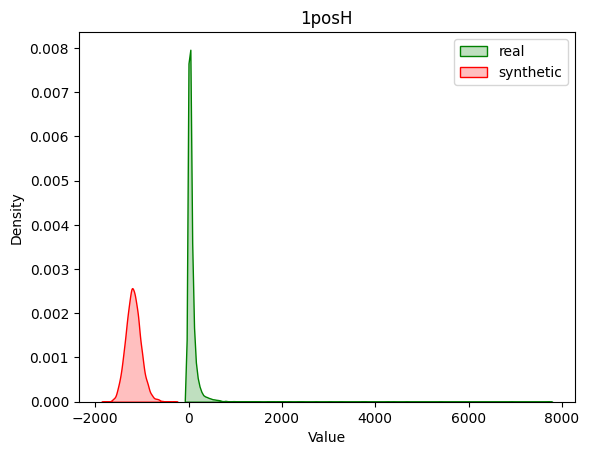

In [8]:
syn=pd.read_csv('/content/drive/MyDrive/transcriptomics-data/synthetic_data_wgangp.csv')


# Create a KDE plot for both datasets
sns.kdeplot(data['1posH'], shade=True, color="green", label="real")
sns.kdeplot(syn['1posH'], shade=True, color="red", label="synthetic")

# Adding labels and a legend
plt.title('1posH')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

In [10]:
from scipy.stats import wasserstein_distance
distance = []

for col in data.columns:
    distance = wasserstein_distance(data[col], syn[col])
    print(f"Feature: {col} | Wasserstein Distance: {distance:.3f}")

average_wasserstein_distance = np.mean(distance)
print(f"\nAverage Wasserstein Distance: {average_wasserstein_distance:.3f}")

Feature: Gene_symbol | Wasserstein Distance: 3323.366
Feature: NAME | Wasserstein Distance: 3105.507
Feature: Foldchange | Wasserstein Distance: 3.496
Feature: PValue | Wasserstein Distance: 0.254
Feature: FDR | Wasserstein Distance: 0.057
Feature: 1posH | Wasserstein Distance: 1253.868
Feature: 2posH | Wasserstein Distance: 1173.902
Feature: 3posH | Wasserstein Distance: 177.176
Feature: 4posH | Wasserstein Distance: 356.571
Feature: 5posH | Wasserstein Distance: 1306.087
Feature: 6posH | Wasserstein Distance: 155.203
Feature: 1negH | Wasserstein Distance: 121.219
Feature: 2negH | Wasserstein Distance: 715.750
Feature: 3negH | Wasserstein Distance: 741.934
Feature: 4negH | Wasserstein Distance: 247.187
Feature: 5negH | Wasserstein Distance: 343.882
Feature: 6negH | Wasserstein Distance: 460.641

Average Wasserstein Distance: 460.641


In [11]:
from scipy.stats import ks_2samp

stat=[]
for col in data.columns:
    stat, p_value = ks_2samp(data[col], syn[col])
    print(f"Feature: {col} | KS Statistic: {stat:.3f} | p-value: {p_value}")

avg_stat = np.mean(stat)
print(f"\nAverage KS Statistic: {avg_stat:.8f}")

Feature: Gene_symbol | KS Statistic: 0.467 | p-value: 0.0
Feature: NAME | KS Statistic: 0.397 | p-value: 0.0
Feature: Foldchange | KS Statistic: 0.994 | p-value: 0.0
Feature: PValue | KS Statistic: 0.630 | p-value: 0.0
Feature: FDR | KS Statistic: 0.914 | p-value: 0.0
Feature: 1posH | KS Statistic: 1.000 | p-value: 0.0
Feature: 2posH | KS Statistic: 0.965 | p-value: 0.0
Feature: 3posH | KS Statistic: 0.708 | p-value: 0.0
Feature: 4posH | KS Statistic: 0.930 | p-value: 0.0
Feature: 5posH | KS Statistic: 0.998 | p-value: 0.0
Feature: 6posH | KS Statistic: 0.482 | p-value: 0.0
Feature: 1negH | KS Statistic: 0.436 | p-value: 0.0
Feature: 2negH | KS Statistic: 1.000 | p-value: 0.0
Feature: 3negH | KS Statistic: 0.961 | p-value: 0.0
Feature: 4negH | KS Statistic: 0.782 | p-value: 0.0
Feature: 5negH | KS Statistic: 0.870 | p-value: 0.0
Feature: 6negH | KS Statistic: 0.668 | p-value: 0.0

Average KS Statistic: 0.66780559
